# Results on IUxray dataset

## Dataset generation and filtering: before and after shuffling statistics (Extended Data Table A1)

In [2]:
import json
import pandas as pd
from IPython.display import display, HTML

datasets = ["IU_xray"]
seeds = [1]
our_eval_seeds=[123]
models = ["chexpert-mimic-cxr-findings-baseline", "mimic-cxr-findings-baseline", "maira-2"]

for dataset in datasets:
    for our_eval_seed in our_eval_seeds:
        for seed in seeds:
            for model in models:
            
                print(f"############# Dataset: {dataset}; Our Eval Seed: {our_eval_seed}; Seed: {seed}; Model: {model}; ##############")

                # Read GT files (without shuffle)
                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/orig_data/gt_reports_as_ref/mcqa_filtering/dataset_statistics.json', 'r') as f:
                    gt_dataset_stats = json.load(f)

                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/orig_data/gt_reports_as_ref/mcqa_filtering/report_level_aggregate_statistics.json', 'r') as f:
                    gt_report_stats = json.load(f)

                # Read GT files (with shuffle)
                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/shuffled_ans_choices_data/gt_reports_as_ref/mcqa_filtering/dataset_statistics.json', 'r') as f:
                    gt_dataset_stats_shuffle = json.load(f)

                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/shuffled_ans_choices_data/gt_reports_as_ref/mcqa_filtering/report_level_aggregate_statistics.json', 'r') as f:
                    gt_report_stats_shuffle = json.load(f)

                # Read Gen files (without shuffle)
                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/orig_data/gen_reports_as_ref/mcqa_filtering/dataset_statistics.json', 'r') as f:
                    gen_dataset_stats = json.load(f)

                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/orig_data/gen_reports_as_ref/mcqa_filtering/report_level_aggregate_statistics.json', 'r') as f:
                    gen_report_stats = json.load(f)

                # Read Gen files (with shuffle)
                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/shuffled_ans_choices_data/gen_reports_as_ref/mcqa_filtering/dataset_statistics.json', 'r') as f:
                    gen_dataset_stats_shuffle = json.load(f)

                with open(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/shuffled_ans_choices_data/gen_reports_as_ref/mcqa_filtering/report_level_aggregate_statistics.json', 'r') as f:
                    gen_report_stats_shuffle = json.load(f)

                # Create data for the table
                data = {
                    ('Metric', ''): [
                        'Acc with report',
                        'Acc w/o report',
                        '# ques answered correctly<br>with report and incorrectly<br>without report (total ques)',
                        'Percentage of above ques',
                        'Mean and std of number<br>of such ques per report'
                    ],
                    ('Questions generated<br>from GT<br>reports', 'without shuffle'): [
                        f"{gt_dataset_stats['Dataset_Accuracy_With_Report']:.2f}%",
                        f"{gt_dataset_stats['Dataset_Accuracy_Without_Report']:.2f}%",
                        f"{gt_dataset_stats['Report_Dependent_Questions_count']} ({gt_dataset_stats['Total_Questions']})",
                        f"{gt_dataset_stats['Report_Dependent_Questions_percentage']:.2f}%",
                        f"{gt_report_stats['Report_Dependent_Questions']['Mean_Count']:.2f} ± {gt_report_stats['Report_Dependent_Questions']['Std_Count']:.2f}"
                    ],
                    ('Questions generated<br>from GT<br>reports', 'with shuffle'): [
                        f"{gt_dataset_stats_shuffle['Dataset_Accuracy_With_Report']:.2f}%",
                        f"{gt_dataset_stats_shuffle['Dataset_Accuracy_Without_Report']:.2f}%",
                        f"{gt_dataset_stats_shuffle['Report_Dependent_Questions_count']} ({gt_dataset_stats_shuffle['Total_Questions']})",
                        f"{gt_dataset_stats_shuffle['Report_Dependent_Questions_percentage']:.2f}%",
                        f"{gt_report_stats_shuffle['Report_Dependent_Questions']['Mean_Count']:.2f} ± {gt_report_stats_shuffle['Report_Dependent_Questions']['Std_Count']:.2f}"
                    ],
                    ('Questions generated<br>from generated<br>reports', 'without shuffle'): [
                        f"{gen_dataset_stats['Dataset_Accuracy_With_Report']:.2f}%",
                        f"{gen_dataset_stats['Dataset_Accuracy_Without_Report']:.2f}%",
                        f"{gen_dataset_stats['Report_Dependent_Questions_count']} ({gen_dataset_stats['Total_Questions']})",
                        f"{gen_dataset_stats['Report_Dependent_Questions_percentage']:.2f}%",
                        f"{gen_report_stats['Report_Dependent_Questions']['Mean_Count']:.2f} ± {gen_report_stats['Report_Dependent_Questions']['Std_Count']:.2f}"
                    ],
                    ('Questions generated<br>from generated<br>reports', 'with shuffle'): [
                        f"{gen_dataset_stats_shuffle['Dataset_Accuracy_With_Report']:.2f}%",
                        f"{gen_dataset_stats_shuffle['Dataset_Accuracy_Without_Report']:.2f}%",
                        f"{gen_dataset_stats_shuffle['Report_Dependent_Questions_count']} ({gen_dataset_stats_shuffle['Total_Questions']})",
                        f"{gen_dataset_stats_shuffle['Report_Dependent_Questions_percentage']:.2f}%",
                        f"{gen_report_stats_shuffle['Report_Dependent_Questions']['Mean_Count']:.2f} ± {gen_report_stats_shuffle['Report_Dependent_Questions']['Std_Count']:.2f}"
                    ]
                }

                # Create DataFrame with MultiIndex columns
                df = pd.DataFrame(data)

                # Display the table with proper line breaks and merged headers
                pd.set_option('display.max_colwidth', None)
                df_styled = df.style.set_properties(**{
                    'white-space': 'pre-wrap',
                    'text-align': 'left'
                }).set_table_styles([
                    {'selector': 'th', 'props': [('white-space', 'pre-wrap'), ('text-align', 'center')]},
                    {'selector': 'th.col_heading.level0', 'props': [('border-left', '2px solid black'), ('border-right', '2px solid black')]},
                    {'selector': 'td', 'props': [('border-left', '2px solid black'), ('border-right', '2px solid black')]},
                    {'selector': 'th.col_heading.level1', 'props': [('border-left', '1px solid gray'), ('border-right', '1px solid gray')]},
                ])

                display(df_styled.hide(axis='index'))

############# Dataset: IU_xray; Our Eval Seed: 123; Seed: 1; Model: chexpert-mimic-cxr-findings-baseline; ##############


############# Dataset: IU_xray; Our Eval Seed: 123; Seed: 1; Model: mimic-cxr-findings-baseline; ##############


############# Dataset: IU_xray; Our Eval Seed: 123; Seed: 1; Model: maira-2; ##############


## MCQA evaluation: dataset level agreement stats   

In [3]:
import pandas as pd
from prettytable import PrettyTable
from prettytable import FRAME, ALL

seeds = [1]
our_eval_seeds = [123, 456, 789, 101, 202]

for our_eval_seed in our_eval_seeds:
    for seed in seeds:
        for shuffle in ["orig_data", "shuffled_ans_choices_data"]:
            dataset = "IU_xray"
            models = [ "chexpert-mimic-cxr-findings-baseline"]
            data = {
                'Questions from GT': [],
                'Questions from Generated Report': []
            }

            print(f"##################### Dataset: {dataset}; Shuffle: {shuffle}; Our Eval Seed: {our_eval_seed}; Seed: {seed} #####################")

            for model in models:
                # Read the CSV files
                gen_report_path = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/{shuffle}/gen_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"
                gt_report_path = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/{shuffle}/gt_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"

                gen_df = pd.read_csv(gen_report_path)
                gt_df = pd.read_csv(gt_report_path)

                # Add data for this model
                data['Questions from GT'].append(
                    f"{gt_df['agreement_percentage'].iloc[0]:.2f}% ({gt_df['agreement_count'].iloc[0]:,}/{gt_df['total_questions'].iloc[0]:,})"
                )
                data['Questions from Generated Report'].append(
                    f"{gen_df['agreement_percentage'].iloc[0]:.2f}% ({gen_df['agreement_count'].iloc[0]:,}/{gen_df['total_questions'].iloc[0]:,})"
                )

            result_df = pd.DataFrame(data, index=models)

            # Save to CSV
            result_df.to_csv('mcq_eval_dataset_level_agreement_stats.csv')

            # Print LaTeX code
            print("\nLaTeX Code:")
            print("""
            \\begin{table}[h]
            \\centering
            \\caption{Agreement Statistics for Different Models}
            \\label{tab:agreement-stats}
            \\begin{tabular}{lcc}
            \\toprule
            \\textbf{Model} & \\textbf{Questions from GT} & \\textbf{Questions from Generated Report} \\\\
            \\midrule""")

            for idx, row in result_df.iterrows():
                print(f"{idx} & {row['Questions from GT']} & {row['Questions from Generated Report']} \\\\")

            print("""\\bottomrule
            \\end{tabular}
            \\end{table}
            """)

            # Create pretty table for PDF-like visualization
            print("\nTable Preview (PDF-like format):")
            pt = PrettyTable()
            pt.field_names = ["Model", "Questions from GT", "Questions from Generated Report"]
            pt.align["Model"] = "l"  # Left align model names
            pt.align["Questions from GT"] = "c"  # Center align data
            pt.align["Questions from Generated Report"] = "c"
            pt.hrules = ALL  # Add horizontal lines between all rows

            for idx, row in result_df.iterrows():
                pt.add_row([idx, row['Questions from GT'], row['Questions from Generated Report']])

            print(pt)

##################### Dataset: IU_xray; Shuffle: orig_data; Our Eval Seed: 123; Seed: 1 #####################

LaTeX Code:

            \begin{table}[h]
            \centering
            \caption{Agreement Statistics for Different Models}
            \label{tab:agreement-stats}
            \begin{tabular}{lcc}
            \toprule
            \textbf{Model} & \textbf{Questions from GT} & \textbf{Questions from Generated Report} \\
            \midrule
chexpert-mimic-cxr-findings-baseline & 48.27% (1,550/3,211) & 65.81% (1,434/2,179) \\
\bottomrule
            \end{tabular}
            \end{table}
            

Table Preview (PDF-like format):
+--------------------------------------+----------------------+---------------------------------+
| Model                                |  Questions from GT   | Questions from Generated Report |
+--------------------------------------+----------------------+---------------------------------+
| chexpert-mimic-cxr-findings-baseline | 48.27% (1,550

In [ ]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from prettytable import FRAME, ALL
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
model_seeds = [1, 2, 3, 4, 5]  # Model training seeds
eval_seeds = [123, 456, 789, 101, 202]  # Evaluation seeds
dataset = "IU_xray"
models = ["chexpert-mimic-cxr-findings-baseline", "mimic-cxr-findings-baseline", "maira-2"]

# Initialize dictionaries to store all results
all_results = {
    'orig_data': {model: {'gt': [], 'gen': []} for model in models},
    'shuffled_data': {model: {'gt': [], 'gen': []} for model in models}
}

# Initialize dictionaries to store results by fixed model seed and fixed eval seed
fixed_model_seed_results = {
    seed: {
        'orig_data': {model: {'gt': [], 'gen': []} for model in models},
        'shuffled_data': {model: {'gt': [], 'gen': []} for model in models}
    } for seed in model_seeds
}

fixed_eval_seed_results = {
    seed: {
        'orig_data': {model: {'gt': [], 'gen': []} for model in models},
        'shuffled_data': {model: {'gt': [], 'gen': []} for model in models}
    } for seed in eval_seeds
}

# Collect all data
for model in models:
    for seed in model_seeds:
        for eval_seed in eval_seeds:
            # Original data
            gen_path = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{eval_seed}/{dataset}/{model}/seed_{seed}/orig_data/gen_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"
            gt_path = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{eval_seed}/{dataset}/{model}/seed_{seed}/orig_data/gt_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"

            gen_df = pd.read_csv(gen_path)
            gt_df = pd.read_csv(gt_path)
            
            # Store in all results
            all_results['orig_data'][model]['gt'].append(gt_df['agreement_percentage'].iloc[0])
            all_results['orig_data'][model]['gen'].append(gen_df['agreement_percentage'].iloc[0])
            
            # Store in fixed model seed results
            fixed_model_seed_results[seed]['orig_data'][model]['gt'].append(gt_df['agreement_percentage'].iloc[0])
            fixed_model_seed_results[seed]['orig_data'][model]['gen'].append(gen_df['agreement_percentage'].iloc[0])
            
            # Store in fixed eval seed results
            fixed_eval_seed_results[eval_seed]['orig_data'][model]['gt'].append(gt_df['agreement_percentage'].iloc[0])
            fixed_eval_seed_results[eval_seed]['orig_data'][model]['gen'].append(gen_df['agreement_percentage'].iloc[0])

            # Shuffled data
            gen_path = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{eval_seed}/{dataset}/{model}/seed_{seed}/shuffled_ans_choices_data/gen_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"
            gt_path = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{eval_seed}/{dataset}/{model}/seed_{seed}/shuffled_ans_choices_data/gt_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"

            gen_df = pd.read_csv(gen_path)
            gt_df = pd.read_csv(gt_path)
            
            # Store in all results
            all_results['shuffled_data'][model]['gt'].append(gt_df['agreement_percentage'].iloc[0])
            all_results['shuffled_data'][model]['gen'].append(gen_df['agreement_percentage'].iloc[0])
            
            # Store in fixed model seed results
            fixed_model_seed_results[seed]['shuffled_data'][model]['gt'].append(gt_df['agreement_percentage'].iloc[0])
            fixed_model_seed_results[seed]['shuffled_data'][model]['gen'].append(gen_df['agreement_percentage'].iloc[0])
            
            # Store in fixed eval seed results
            fixed_eval_seed_results[eval_seed]['shuffled_data'][model]['gt'].append(gt_df['agreement_percentage'].iloc[0])
            fixed_eval_seed_results[eval_seed]['shuffled_data'][model]['gen'].append(gen_df['agreement_percentage'].iloc[0])

# Create main summary table across ALL seeds
# for data_type in ['orig_data', 'shuffled_data']:
for data_type in ['shuffled_data']:
    print(f"\n{data_type.replace('_', ' ').title()} Results (across ALL seeds):")
    
    data = {
        'Questions from GT': [],
        'Questions from Generated Report': []
    }

    for model in models:
        gt_values = all_results[data_type][model]['gt']
        gen_values = all_results[data_type][model]['gen']
        
        gt_mean = np.mean(gt_values)
        gt_std = np.std(gt_values)
        gen_mean = np.mean(gen_values)
        gen_std = np.std(gen_values)
        
        data['Questions from GT'].append(f"{gt_mean:.2f}% ± {gt_std:.2f}")
        data['Questions from Generated Report'].append(f"{gen_mean:.2f}% ± {gen_std:.2f}")

    result_df = pd.DataFrame(data, index=models)
    
    # Print table
    pt = PrettyTable()
    pt.field_names = ["Model", "Questions from GT", "Questions from Generated Report"]
    pt.align["Model"] = "l"
    pt.align["Questions from GT"] = "c"
    pt.align["Questions from Generated Report"] = "c"
    pt.hrules = ALL

    for idx, row in result_df.iterrows():
        pt.add_row([idx, row['Questions from GT'], row['Questions from Generated Report']])

    print(pt)

# Create visualization for variation by eval seed (fixed model seeds)
for data_type in ['orig_data', 'shuffled_data']:
    plt.figure(figsize=(15, 5))
    
    for i, model in enumerate(models):
        plt.subplot(1, 3, i+1)
        
        # Plot data for each fixed model seed
        for seed in model_seeds:
            gt_values = fixed_model_seed_results[seed][data_type][model]['gt']
            plt.plot(eval_seeds, gt_values, 'o-', label=f'GT (seed={seed})')
            
            gen_values = fixed_model_seed_results[seed][data_type][model]['gen']
            plt.plot(eval_seeds, gen_values, 's--', label=f'Gen (seed={seed})')
        
        plt.title(f"{model}\n{data_type.replace('_', ' ').title()}")
        plt.xlabel("Evaluation Seed")
        plt.ylabel("Agreement Percentage")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'variation_by_eval_seed_{data_type}.png', bbox_inches='tight')
    plt.close()

# Create visualization for variation by model seed (fixed eval seeds)
for data_type in ['orig_data', 'shuffled_data']:
    plt.figure(figsize=(15, 5))
    
    for i, model in enumerate(models):
        plt.subplot(1, 3, i+1)
        
        # Plot data for each fixed eval seed
        for eval_seed in eval_seeds:
            gt_values = fixed_eval_seed_results[eval_seed][data_type][model]['gt']
            plt.plot(model_seeds, gt_values, 'o-', label=f'GT (eval={eval_seed})')
            
            gen_values = fixed_eval_seed_results[eval_seed][data_type][model]['gen']
            plt.plot(model_seeds, gen_values, 's--', label=f'Gen (eval={eval_seed})')
        
        plt.title(f"{model}\n{data_type.replace('_', ' ').title()}")
        plt.xlabel("Model Seed")
        plt.ylabel("Agreement Percentage")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'variation_by_model_seed_{data_type}.png', bbox_inches='tight')
    plt.close()


Shuffled Data Results (across ALL seeds):
+--------------------------------------+-------------------+---------------------------------+
| Model                                | Questions from GT | Questions from Generated Report |
+--------------------------------------+-------------------+---------------------------------+
| chexpert-mimic-cxr-findings-baseline |   65.56% ± 0.39   |          77.01% ± 0.32          |
+--------------------------------------+-------------------+---------------------------------+
| mimic-cxr-findings-baseline          |   65.47% ± 0.37   |          73.53% ± 0.91          |
+--------------------------------------+-------------------+---------------------------------+
| maira-2                              |   66.74% ± 0.49   |          78.74% ± 0.47          |
+--------------------------------------+-------------------+---------------------------------+


: 

## MCQA evaluation: report level results (Fig. 3)

############# Dataset: IU_xray; Our Eval Seed: 123; Seed: 1; Model: chexpert-mimic-cxr-findings-baseline; Shuffle: shuffled_ans_choices_data; ##############


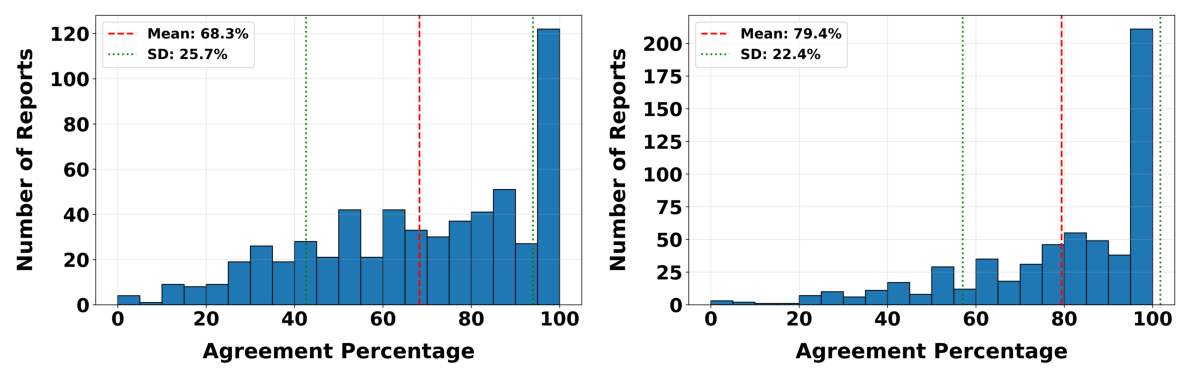

############# Dataset: IU_xray; Our Eval Seed: 123; Seed: 1; Model: mimic-cxr-findings-baseline; Shuffle: shuffled_ans_choices_data; ##############


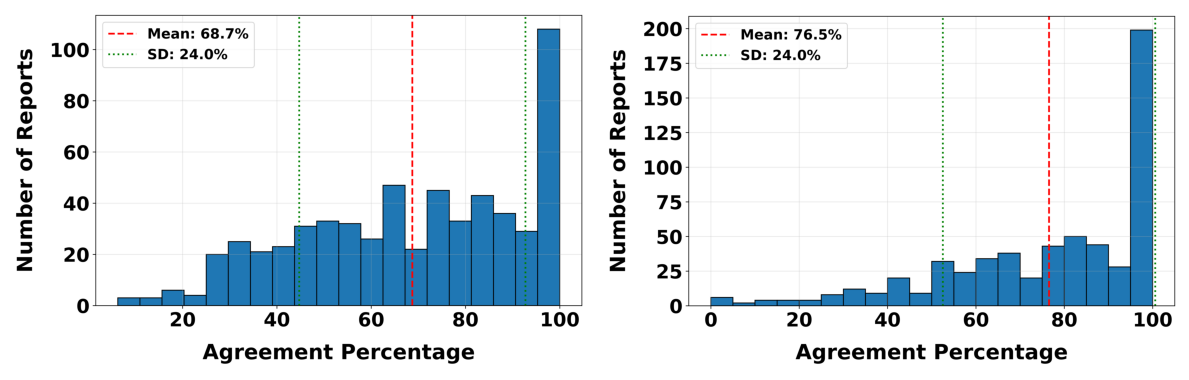

############# Dataset: IU_xray; Our Eval Seed: 123; Seed: 1; Model: maira-2; Shuffle: shuffled_ans_choices_data; ##############


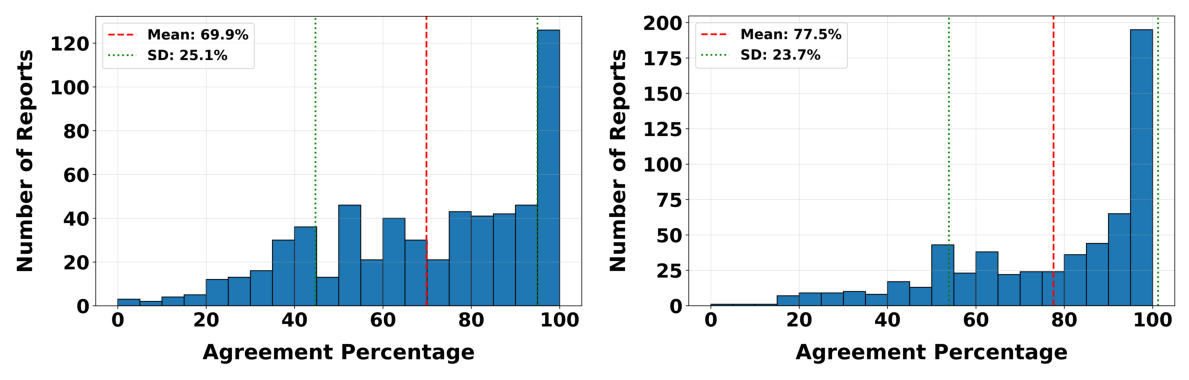

In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

seeds = [1]
our_eval_seeds = [123]

for our_eval_seed in our_eval_seeds:
    for seed in seeds:
        # shuffle = ["orig_data", "shuffled_ans_choices_data"]
        shuffle = ["shuffled_ans_choices_data"]
        dataset = "IU_xray"
        models = ["chexpert-mimic-cxr-findings-baseline", "mimic-cxr-findings-baseline", "maira-2"]
        # models = ["chexpert-mimic-cxr-findings-baseline"]

        for s in shuffle:
            for model in models:
                print(f"############# Dataset: {dataset}; Our Eval Seed: {our_eval_seed}; Seed: {seed}; Model: {model}; Shuffle: {s}; ##############")
                # Read the two plot images
                # Replace 'plot1.png' and 'plot2.png' with your actual file paths
                plot1 = mpimg.imread(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/{s}/gt_reports_as_ref/mcqa_eval/mcq_eval_report_level_agreement_hist.png')
                plot2 = mpimg.imread(f'/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{our_eval_seed}/{dataset}/{model}/seed_{seed}/{s}/gen_reports_as_ref/mcqa_eval/mcq_eval_report_level_agreement_hist.png')

                # Create a figure with two subplots side by side
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

                # Display the plots
                ax1.imshow(plot1)
                ax1.axis('off')  # Hide axes
                ax2.imshow(plot2)
                ax2.axis('off')  # Hide axes

                # Adjust the layout and display
                plt.tight_layout()
                plt.show()

## Stability of agreement score across eval seeds and model seeds

### Extended Data Fig. A3

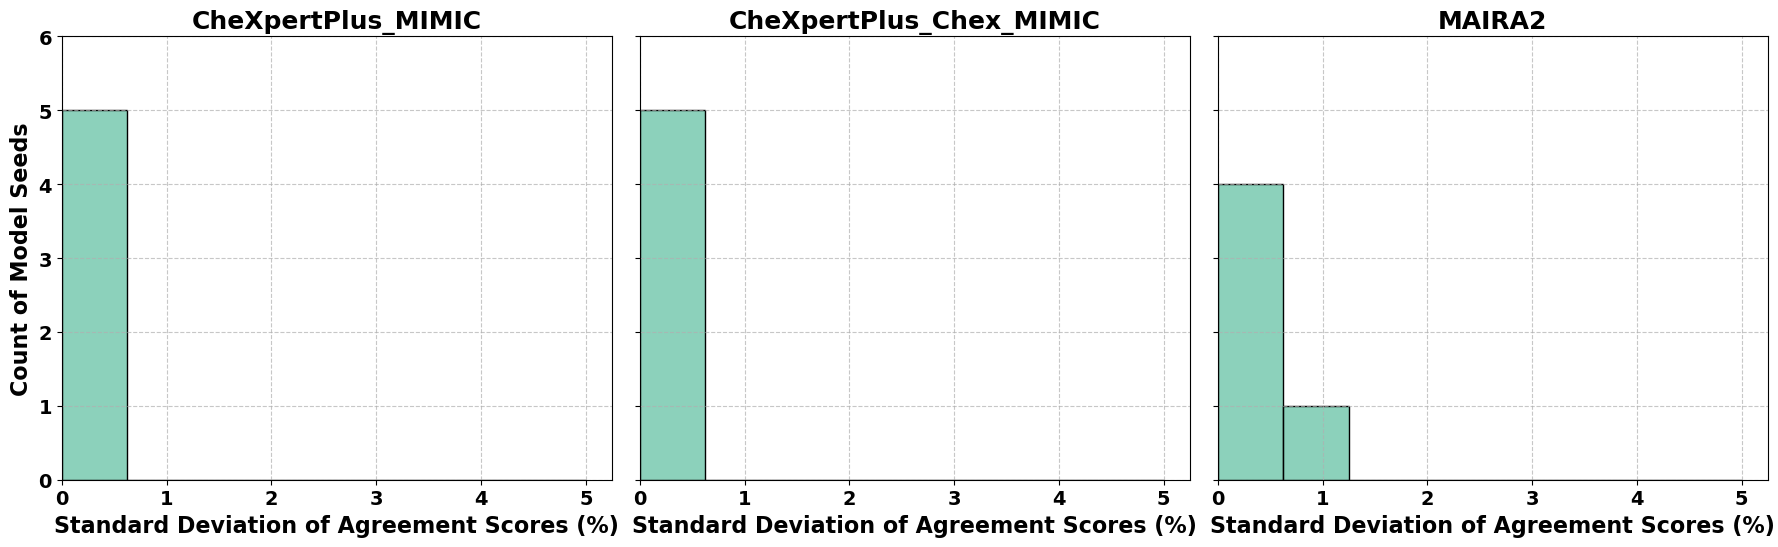

saved to  /gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_summarized_results/IU_xray/dataset_level_results/std_distribution_histogram_Questions_from_Ground_Truth_Reports_Shuffled.png


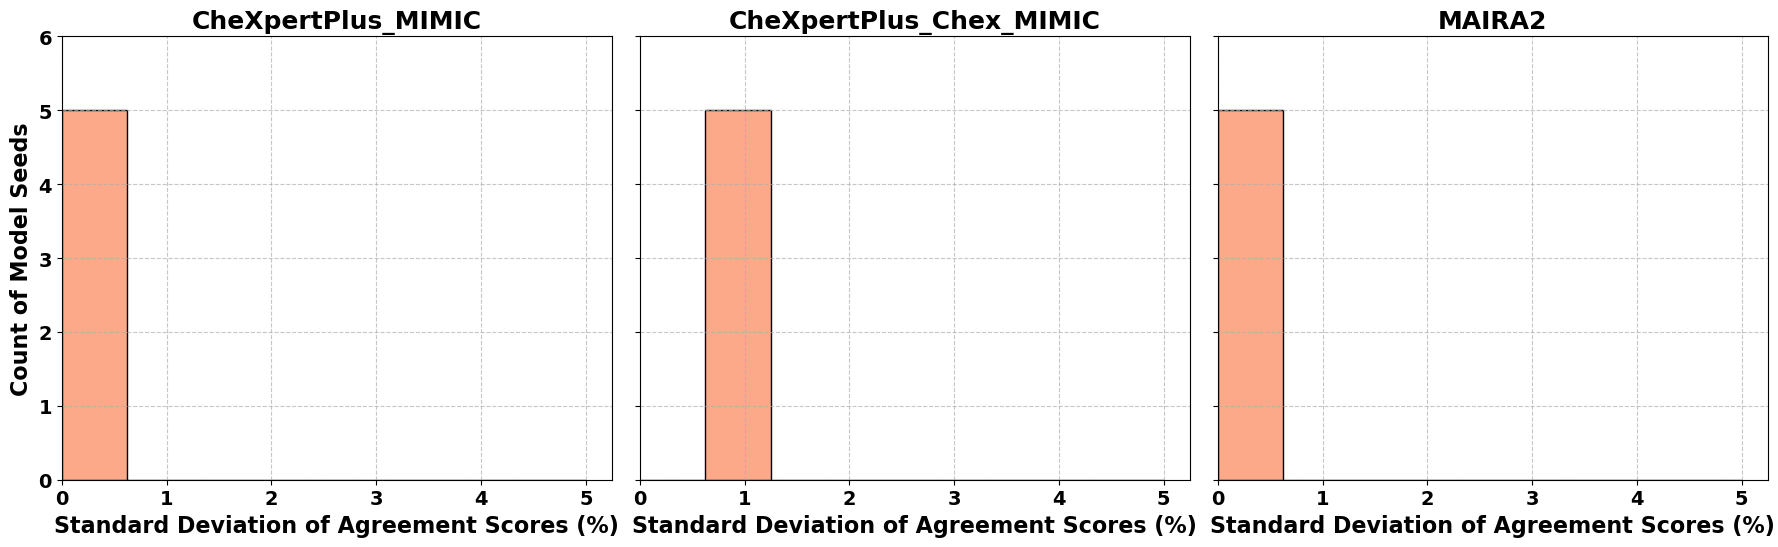

saved to  /gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_summarized_results/IU_xray/dataset_level_results/std_distribution_histogram_Questions_from_Generated_Reports_Shuffled.png


: 

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable, ALL

# Configuration
MODEL_SEEDS = [1, 2, 3, 4, 5]  # Model training seeds
EVAL_SEEDS = [123, 456, 789, 202, 101]  # Evaluation seeds
DATASET = "IU_xray"
MODELS = ["chexpert-mimic-cxr-findings-baseline", "mimic-cxr-findings-baseline", "maira-2"]
DATA_TYPES = ["orig_data", "shuffled_data"]  # Original and shuffled data

# Use Seaborn's Set2 palette for consistent colors
PALETTE_SET2 = sns.color_palette("Set2")
COLOR_MAPPING = {"Questions from Ground Truth Reports": PALETTE_SET2[0],  
                 "Questions from Generated Reports": PALETTE_SET2[1]}

# Function to load data
def load_data():
    results = []
    for model in MODELS:
        for seed in MODEL_SEEDS:
            for eval_seed in EVAL_SEEDS:
                for data_type in DATA_TYPES:
                    # Define paths based on data type
                    prefix = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_seed{eval_seed}/{DATASET}/{model}/seed_{seed}"
                    if data_type == "orig_data":
                        gen_path = f"{prefix}/orig_data/gen_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"
                        gt_path = f"{prefix}/orig_data/gt_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"
                    else:
                        gen_path = f"{prefix}/shuffled_ans_choices_data/gen_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"
                        gt_path = f"{prefix}/shuffled_ans_choices_data/gt_reports_as_ref/mcqa_eval/mcq_eval_dataset_level_agreement_stats.csv"

                    # Read CSVs
                    gen_df = pd.read_csv(gen_path)
                    gt_df = pd.read_csv(gt_path)

                    # Store results
                    results.append({
                        "Model": model,
                        "Model Seed": seed,
                        "Eval Seed": eval_seed,
                        "Data Type": "Original" if data_type == "orig_data" else "Shuffled",
                        "Type": "Questions from Ground Truth Reports",
                        "Agreement Score (%)": gt_df['agreement_percentage'].iloc[0]
                    })
                    results.append({
                        "Model": model,
                        "Model Seed": seed,
                        "Eval Seed": eval_seed,
                        "Data Type": "Original" if data_type == "orig_data" else "Shuffled",
                        "Type": "Questions from Generated Reports",
                        "Agreement Score (%)": gen_df['agreement_percentage'].iloc[0]
                    })
    return pd.DataFrame(results)


# Function to plot histogram of standard deviations across eval seeds
def plot_std_histogram_by_model(df, data_type, output_dir):
    # Set font sizes
    plt.rcParams.update({
        'font.size': 14,
        'font.weight': 'bold',
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'axes.labelweight': 'bold',
        'legend.fontsize': 14,
        'legend.title_fontsize': 16
    })
    
    # Define custom title mapping
    title_mapping = {
        MODELS[0]: "CheXpertPlus_MIMIC",
        MODELS[1]: "CheXpertPlus_Chex_MIMIC", 
        MODELS[2]: "MAIRA2"
    }
    
    # Create separate plots for GT and Generated reports
    for report_type, color in COLOR_MAPPING.items():
        # Create figure with subplots (one for each model)
        fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        
        for i, model in enumerate(MODELS):
            std_data = []
            
            for seed in MODEL_SEEDS:
                # Get values for this report type
                values = df[(df["Model"] == model) & (df["Data Type"] == data_type) & 
                           (df["Type"] == report_type) & 
                           (df["Model Seed"] == seed)]['Agreement Score (%)']
                
                if len(values) > 1:  # Only calculate std if we have multiple eval seeds
                    std_data.append({
                        "Model Seed": seed,
                        "Standard Deviation": np.std(values)
                    })
            
            std_df = pd.DataFrame(std_data)
            
            if len(std_df) > 0:
                # Create the histogram for this model
                ax = axes[i]
                
                # Use seaborn for better aesthetics with explicit bin range
                max_std = std_df["Standard Deviation"].max()
                bin_edges = np.linspace(0, max(5, np.ceil(max_std)), 9)  # Ensure bins start from 0
                
                sns.histplot(data=std_df, x="Standard Deviation", color=color, 
                            bins=bin_edges, ax=ax)
                
                # Removed mean line and legend
                
                # Customize the plot with custom title
                custom_title = title_mapping.get(model, model.replace('-', ' ').title())
                ax.set_title(f"{custom_title}", fontweight='bold')
                
                # Only add y-label for the first subplot
                if i == 0:
                    ax.set_ylabel("Count of Model Seeds", fontweight='bold')
                
                ax.set_xlabel("Standard Deviation of Agreement Scores (%)", fontweight='bold')
                ax.grid(True, linestyle='--', alpha=0.7)
                
                # Set x-axis to start from 0
                ax.set_xlim(left=0)
                
                # Set y-axis to start from 0 and have integer ticks
                ax.set_ylim(bottom=0, top=6)
                max_count = int(np.ceil(ax.get_ylim()[1]))
                ax.set_yticks(range(0, max_count + 1))
                
                # Make tick labels bold
                for label in ax.get_xticklabels() + ax.get_yticklabels():
                    label.set_fontweight('bold')
                
                # Legend removed
        
        # plt.suptitle(f"Distribution of Standard Deviations - {report_type} ({data_type} Data)", 
                    # fontsize=18, fontweight='bold')
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(f"{output_dir}/std_distribution_histogram_{report_type.replace(' ', '_')}_{data_type}.png", 
                   bbox_inches="tight", dpi=600)
        plt.show()
        print("saved to ", f"{output_dir}/std_distribution_histogram_{report_type.replace(' ', '_')}_{data_type}.png")

# Main execution
if __name__ == "__main__":
    df = load_data()
    
    for data_type in ["Shuffled"]:
        output_dir = f"/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation/MCQ_gen_data_our_eval_summarized_results/{DATASET}/dataset_level_results"
        os.makedirs(output_dir, exist_ok=True)
        plot_std_histogram_by_model(df, data_type, output_dir)

### Extended Data Fig. A4

Loaded 30 files with a total of 17692 records
Calculated standard deviations for 3540 report-model-seed-metric combinations


/tmp/ipykernel_805315/1251940874.py:197: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust for the suptitle and colorbar


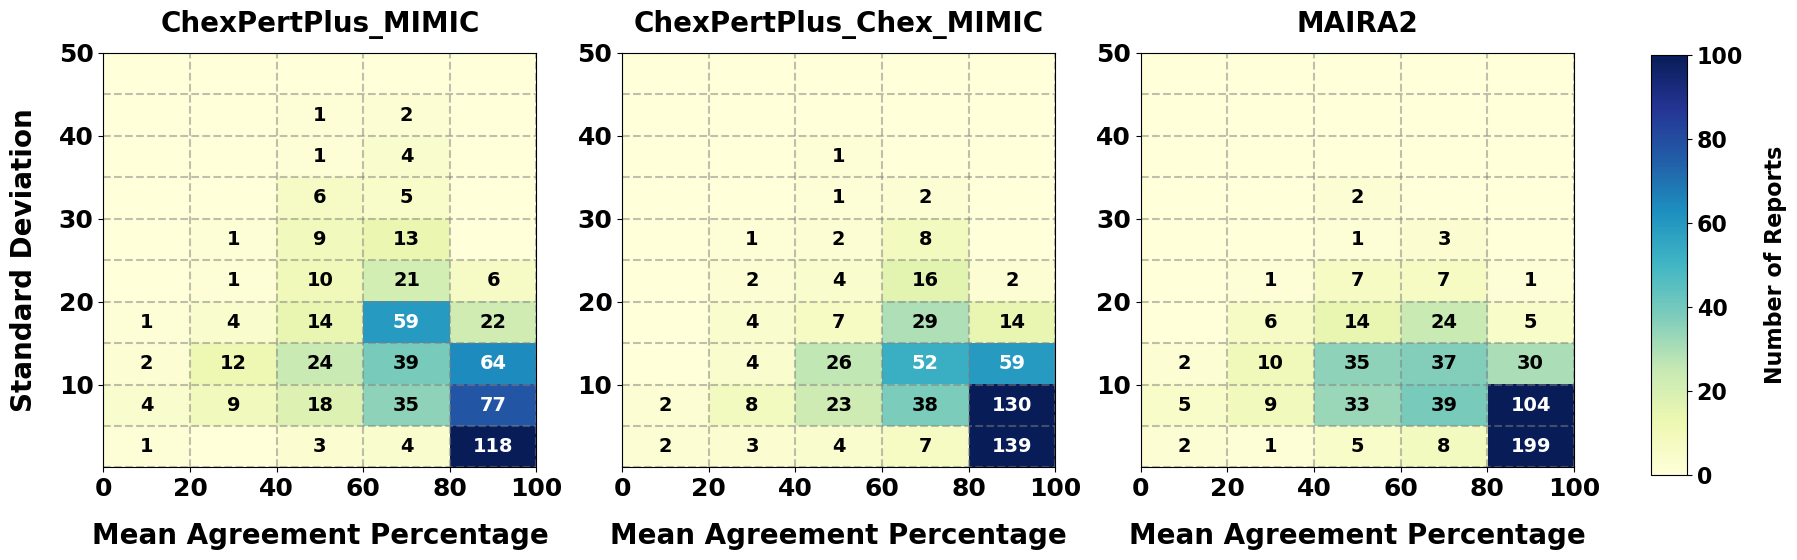

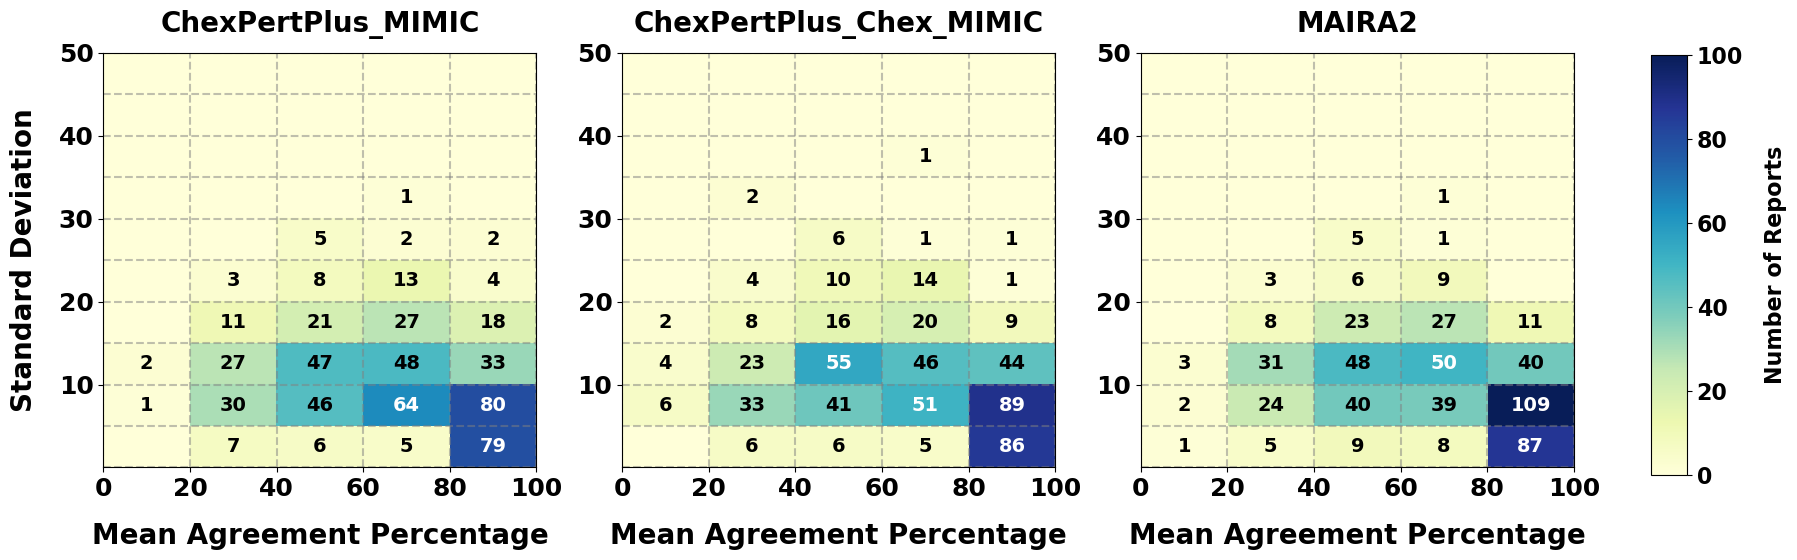

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration parameters
DATASET = 'IU_xray'
BASE_DIR = '/gpfs/data/oermannlab/users/rd3571/RRG_evaluation/MCQ_generation'
model_names = [ "mimic-cxr-findings-baseline", "chexpert-mimic-cxr-findings-baseline", "maira-2"]
model_names_for_plots = ["ChexPertPlus_MIMIC", "ChexPertPlus_Chex_MIMIC", "MAIRA2"]

# model_seeds = ['1', '2', '3', '4', '5']
model_seeds = ['1']
eval_seeds = ['123', '456', '789', '101', '202']
metrics = ["gen_reports_as_ref", "gt_reports_as_ref"]
output_dir = os.path.join(BASE_DIR, 'variation_analysis', DATASET)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Function to construct exact file path
def get_file_path(eval_seed, model, model_seed, metric):
    return os.path.join(
        BASE_DIR, 
        f"MCQ_gen_data_our_eval_seed{eval_seed}",
        DATASET,
        model,
        f"seed_{model_seed}",
        "shuffled_ans_choices_data",
        metric,
        "mcqa_eval",
        "mcq_eval_report_level_stats.csv"
    )

# Load data from exact paths
data_list = []
for eval_seed in eval_seeds:
    for model in model_names:
        for model_seed in model_seeds:
            for metric in metrics:
                file_path = get_file_path(eval_seed, model, model_seed, metric)
                
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)
                    df['Model'] = model
                    df['Metric'] = metric
                    df['Model_Seed'] = model_seed
                    df['Eval_Seed'] = eval_seed
                    data_list.append(df)
                else:
                    print(f"Warning: File not found: {file_path}")

# Check if we have data
if not data_list:
    raise ValueError("No data files were found. Please check the paths and parameters.")

# Combine all data
df_all = pd.concat(data_list, ignore_index=True)
print(f"Loaded {len(data_list)} files with a total of {len(df_all)} records")

# Calculate standard deviation and mean for each report across eval seeds
std_results = []
for model in model_names:
    for model_seed in model_seeds:
        for metric in metrics:
            mask = (df_all['Model'] == model) & \
                  (df_all['Model_Seed'] == model_seed) & \
                  (df_all['Metric'] == metric)
            
            subset = df_all[mask]
            
            # Only calculate if we have data from multiple eval seeds
            if subset['Eval_Seed'].nunique() > 1:
                # Calculate standard deviation and mean for each report
                report_stats = subset.groupby('Report_ID')['Agreement_Percentage'].agg(['std', 'mean']).reset_index()
                report_stats['Model'] = model
                report_stats['Model_Seed'] = model_seed
                report_stats['Metric'] = metric
                report_stats['Num_Eval_Seeds'] = subset['Eval_Seed'].nunique()
                
                std_results.append(report_stats)
            else:
                print(f"Skipping {model}, seed {model_seed}, {metric} - insufficient eval seeds")

# Check if we have standard deviation results
if not std_results:
    raise ValueError("No standard deviation results could be calculated. Check if you have multiple evaluation seeds for each combination.")

df_std = pd.concat(std_results, ignore_index=True)
print(f"Calculated standard deviations for {len(df_std)} report-model-seed-metric combinations")


# 2. Heatmap of Agreement vs Standard Deviation - separate plots for each seed
for metric in metrics:
    # Create separate plots for each model seed
    for i, model_seed in enumerate(model_seeds):
        # Create a figure with 3 subplots (one for each model)
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        # fig.suptitle(f'Distribution of Reports by Agreement and Variability - {metric} - Seed {model_seed}', fontsize=16)
        
        for j, model in enumerate(model_names):
            # Get data for this specific model and seed
            model_data = df_std[
                (df_std['Model'] == model) & 
                (df_std['Metric'] == metric) &
                (df_std['Model_Seed'] == model_seed)
            ].copy()
            
            ax = axes[j]
            
            if len(model_data) > 0:
                # Create bins for both axes
                agreement_bins = [0, 20, 40, 60, 80, 100]
                std_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
                
                # Create a 2D histogram
                hist, xedges, yedges = np.histogram2d(
                    model_data['mean'], 
                    model_data['std'], 
                    bins=[agreement_bins, std_bins]
                )
                
                # Create a heatmap
                im = ax.imshow(
                    hist.T, 
                    origin='lower', 
                    aspect='auto',
                    extent=[0, 100, 0, 50],
                    cmap='YlGnBu',
                    vmin=0,
                    vmax=100  # Set a consistent color scale
                )
                
                # Add count annotations to each cell
                for k in range(len(agreement_bins)-1):
                    for l in range(len(std_bins)-1):
                        # Calculate center of each cell for text placement
                        x_center = (agreement_bins[k] + agreement_bins[k+1]) / 2
                        y_center = (std_bins[l] + std_bins[l+1]) / 2
                        
                        # Only add text if there are reports in this cell
                        if hist[k, l] > 0:
                            ax.text(x_center, y_center, f'{int(hist[k, l])}', 
                                    ha='center', va='center', 
                                    color='black' if hist[k, l] < 50 else 'white',
                                    fontweight='bold', fontsize=14)
                
                # Add grid lines for bins
                for bin_edge in agreement_bins:
                    ax.axvline(bin_edge, color='gray', linestyle='--', alpha=0.5)
                for bin_edge in std_bins:
                    ax.axhline(bin_edge, color='gray', linestyle='--', alpha=0.5)
                
                # Set title and labels
                ax.set_title(f'{model_names_for_plots[j]}', fontsize=20, fontweight='bold', pad=15)
                ax.set_xlabel('Mean Agreement Percentage', fontsize=20, fontweight='bold', labelpad=15)

                # Make x and y ticks bold and increase font size
                ax.tick_params(axis='both', which='major', labelsize=18)  # sets tick label size


                # Manually set tick font weight to bold
                for tick in ax.get_xticklabels():
                    tick.set_fontweight('bold')

                
                yticks = ax.get_yticks()
                yticklabels = [label.get_text() for label in ax.get_yticklabels()]

                # Filter out '0' label
                new_yticks = [tick for tick, label in zip(yticks, yticklabels) if label != '0']
                ax.set_yticks(new_yticks)

                for tick in ax.get_yticklabels():
                    tick.set_fontweight('bold')
                    
                
                # Only add y-label for the first subplot
                if j == 0:
                    ax.set_ylabel('Standard Deviation', fontsize=20, fontweight='bold', labelpad=15)
            else:
                ax.text(0.5, 0.5, 'No data available', 
                        ha='center', va='center', transform=ax.transAxes)
        
        # Add a colorbar that applies to all subplots
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax)
        cbar.set_label('Number of Reports', fontsize=16, weight='bold', labelpad=15)

        # Set tick label font size and weight
        cbar.ax.tick_params(labelsize=16)  # size of tick labels
        for tick in cbar.ax.get_yticklabels():
            tick.set_fontweight('bold')
        

        plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust for the suptitle and colorbar
        plt.savefig(os.path.join(output_dir, f'heatmap_agreement_vs_std_seed{model_seed}_{metric}.png'), dpi=300)
        plt.show()
